<a href="https://colab.research.google.com/github/SeptiLutfiana/MESIN-LEARNING/blob/main/UTS_Septi_Lutfiana_Clustering_Image_Segmentation_Soal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### UTS
* Septi Lutfiana
* 2141720038
* 3H TI

# Segmentasi Gambar dengan Clustering

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

## Plat 1

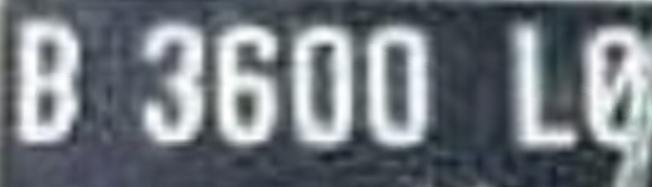

In [46]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/ML/1.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img) # khusus google colab karena ada issue

In [47]:
#kode mencetak tinggi (height), lebar (width), dan jumlah saluran warna (channels) dari gambar
h, w, ch= img.shape
print(h)
print(w)
print(ch)

187
652
3


In [48]:
data = img / 255.0 # normalisasi gambar dengan membagi setiap nilai piksel dalam gambar (img) dengan 255.0.
data = data.reshape(h * w, ch) #mengubah bentuk array
data.shape

(121924, 3)

In [49]:
#menggambarkan distribusi piksel dalam citra berdasarkan warna tertentu
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

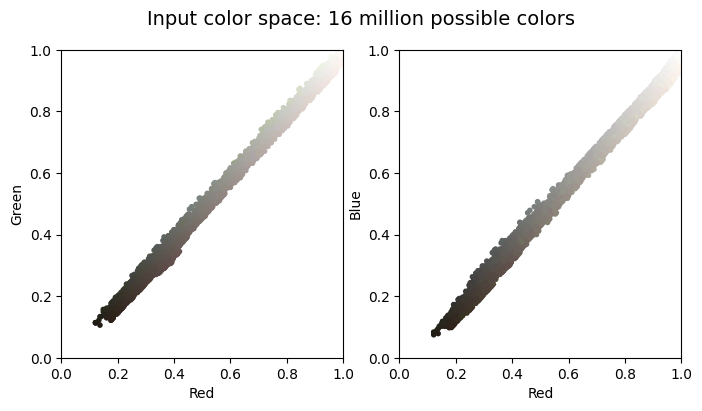

In [50]:
plot_pixels(data, title='Input color space: 16 million possible colors')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


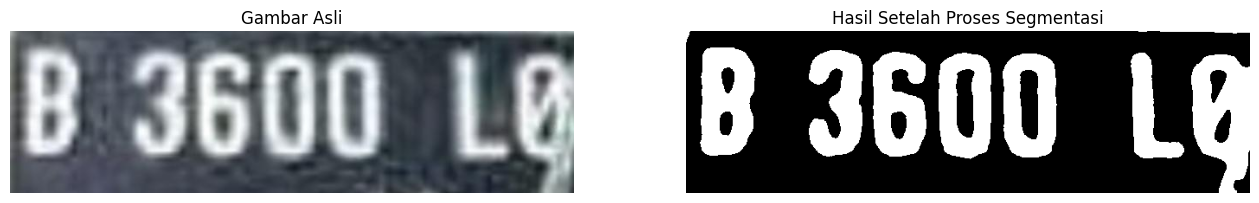

In [53]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Proses Segmentasi')
plt.axis('off')

plt.show()

## Plat 2

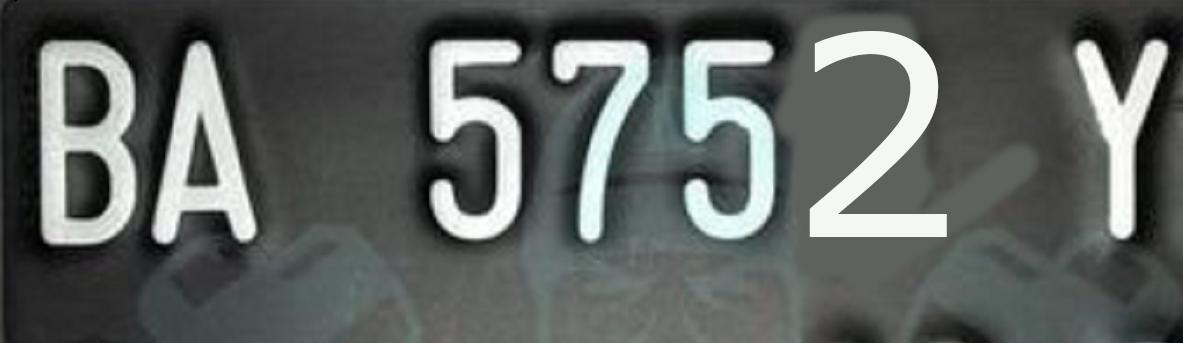

In [54]:
# Load Gambar
img2 = cv2.imread('/content/drive/MyDrive/ML/2.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img2) # khusus google colab karena ada issue

In [55]:
#kode mencetak tinggi (height), lebar (width), dan jumlah saluran warna (channels) dari gambar
h, w, ch= img2.shape
print(h)
print(w)
print(ch)

343
1183
3


In [56]:
data = img2 / 255.0 # normalisasi gambar dengan membagi setiap nilai piksel dalam gambar (img) dengan 255.0.
data = data.reshape(h * w, ch) #mengubah bentuk array
data.shape

(405769, 3)

In [57]:
#menggambarkan distribusi piksel dalam citra berdasarkan warna tertentu
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

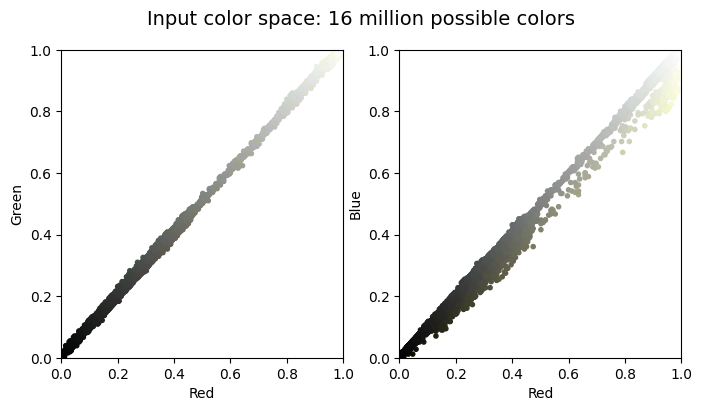

In [58]:
plot_pixels(data, title='Input color space: 16 million possible colors')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


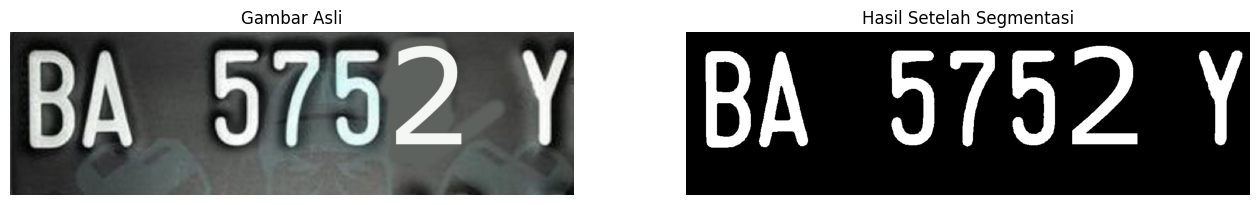

In [59]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Segmentasi')
plt.axis('off')

plt.show()

## plat 3


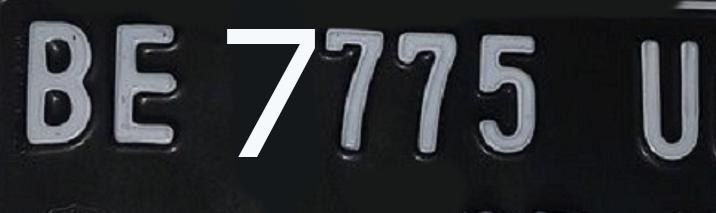

In [61]:
# Load Gambar
img3 = cv2.imread('/content/drive/MyDrive/ML/3.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img3) # khusus google colab karena ada issue

In [64]:
#kode mencetak tinggi (height), lebar (width), dan jumlah saluran warna (channels) dari gambar
h, w, ch= img3.shape
print(h)
print(w)
print(ch)

213
716
3


In [65]:
data = img3 / 255.0 # normalisasi gambar dengan membagi setiap nilai piksel dalam gambar (img) dengan 255.0.
data = data.reshape(h * w, ch) #mengubah bentuk array
data.shape

(152508, 3)

In [66]:
#menggambarkan distribusi piksel dalam citra berdasarkan warna tertentu
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

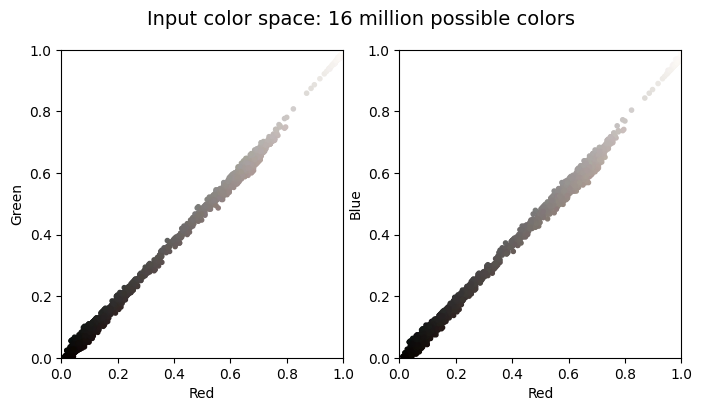

In [67]:
plot_pixels(data, title='Input color space: 16 million possible colors')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


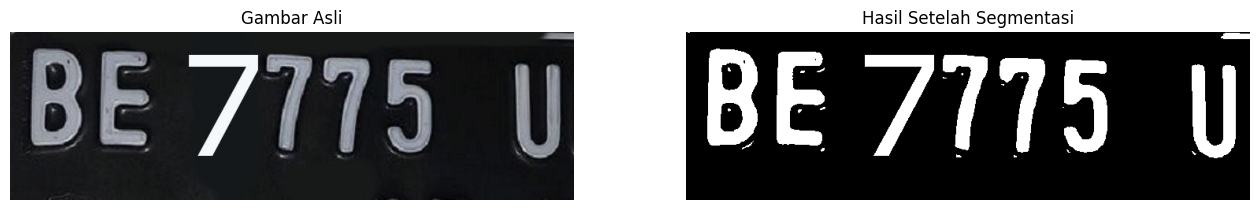

In [68]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Segmentasi')
plt.axis('off')

plt.show()

## plat 4

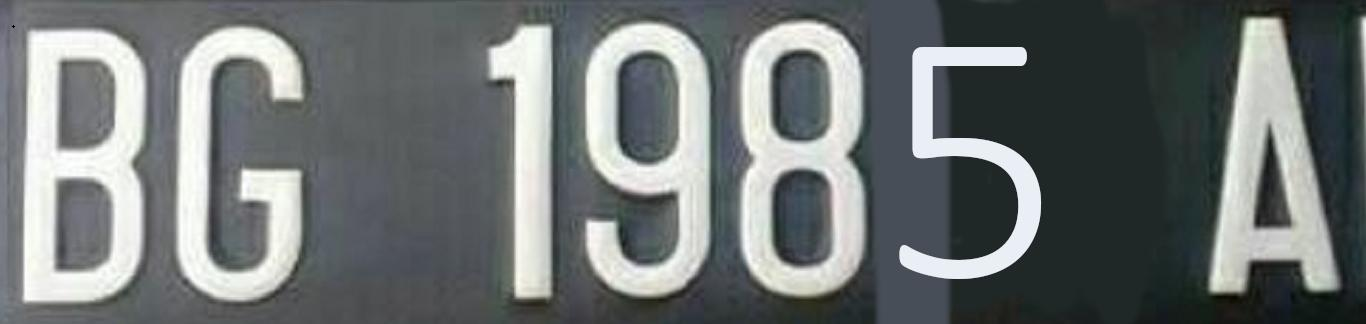

In [69]:
# Load Gambar
img4 = cv2.imread('/content/drive/MyDrive/ML/4.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img4) # khusus google colab karena ada issue

In [70]:
#kode mencetak tinggi (height), lebar (width), dan jumlah saluran warna (channels) dari gambar
h, w, ch= img4.shape
print(h)
print(w)
print(ch)

324
1366
3


In [71]:
data = img4 / 255.0 # normalisasi gambar dengan membagi setiap nilai piksel dalam gambar (img) dengan 255.0.
data = data.reshape(h * w, ch) #mengubah bentuk array
data.shape

(442584, 3)

In [72]:
#menggambarkan distribusi piksel dalam citra berdasarkan warna tertentu
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

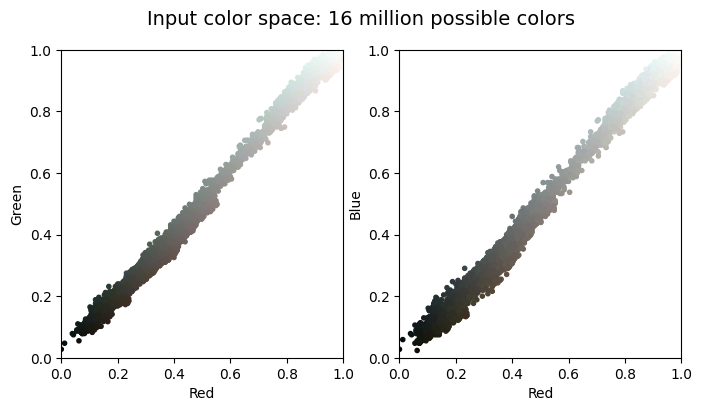

In [73]:
plot_pixels(data, title='Input color space: 16 million possible colors')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


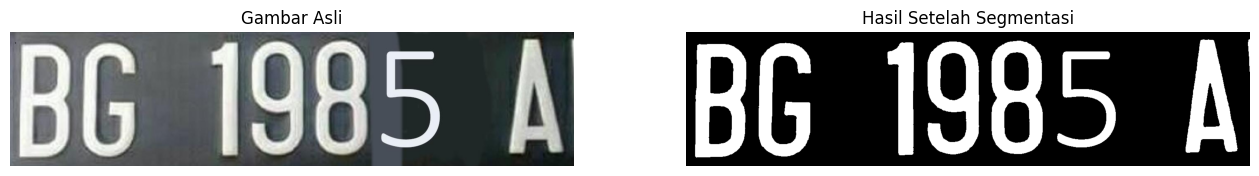

In [74]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Segmentasi')
plt.axis('off')

plt.show()

## Plat 5

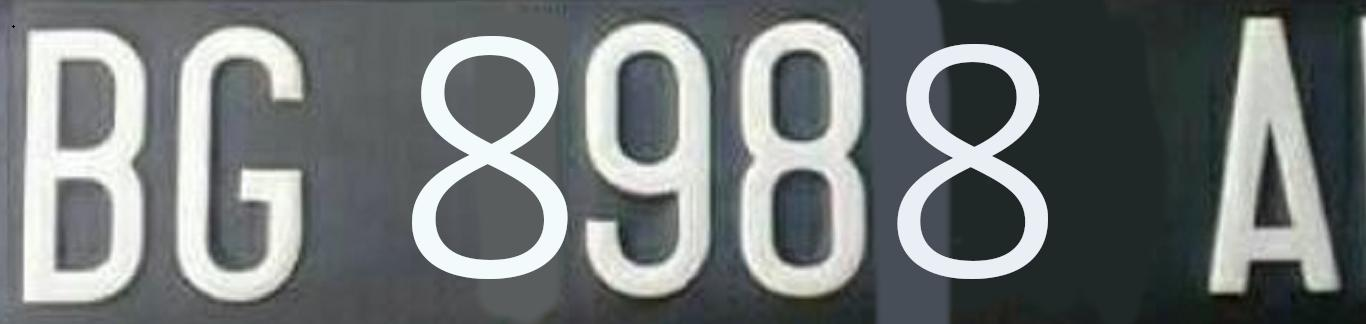

In [75]:
# Load Gambar
img5 = cv2.imread('/content/drive/MyDrive/ML/5.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img5) # khusus google colab karena ada issue

In [76]:
#kode mencetak tinggi (height), lebar (width), dan jumlah saluran warna (channels) dari gambar
h, w, ch= img5.shape
print(h)
print(w)
print(ch)

324
1366
3


In [80]:
data = img5 / 255.0 # normalisasi gambar dengan membagi setiap nilai piksel dalam gambar (img) dengan 255.0.
data = data.reshape(h * w, ch) #mengubah bentuk array
data.shape

(442584, 3)

In [81]:
#menggambarkan distribusi piksel dalam citra berdasarkan warna tertentu
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

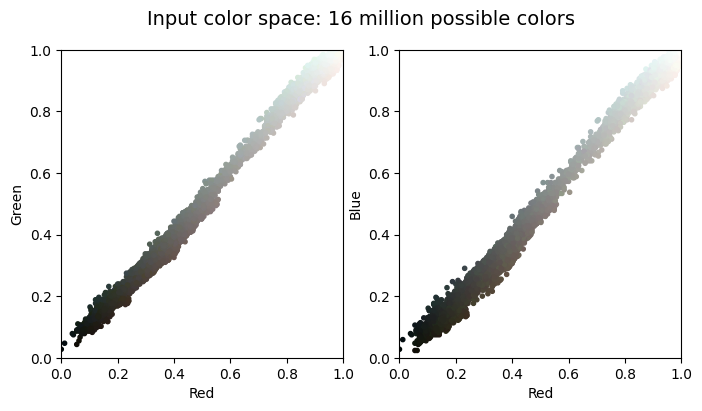

In [82]:
plot_pixels(data, title='Input color space: 16 million possible colors')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


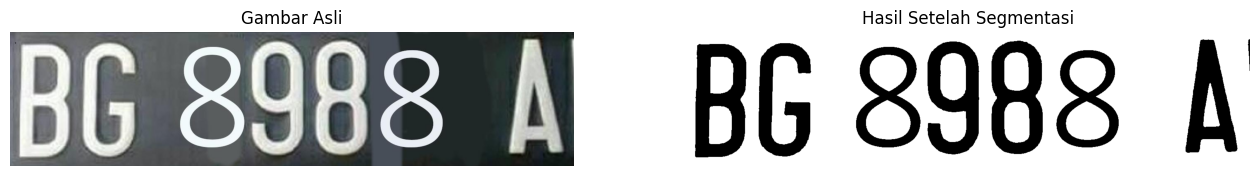

In [83]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Segmentasi')
plt.axis('off')

plt.show()